In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IncomeInvestment

In [2]:
# IncomeInvestement
income_dataset = pd.read_excel('IncomeInvestment_Predictions.xlsx')
income_dataset.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,MLP IncomeInvestment,RF IncomeInvestment,LR IncomeInvestment,KNN IncomeInvestment,SVM IncomeInvestment,GB IncomeInvestment,DT+Ada IncomeInvestment,NB IncomeInvestment,XGB IncomeInvestment,Bagging
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,1,1,1,1,1,1,1,0,1,1
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1,1,1,1,1,1,1,1,1,1
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,1,1,1,1,1,1,1,1,1,1
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1,1,1,1,1,1,1,1,0,1
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,0,0,0,0,0,0,0,0,0,0


In [3]:
# Let's keep only the overall prediction, that's the 'bagging' one
columns_to_drop = [6, 7, 8, 9, 10, 11, 12, 13, 14]
income_dataset.drop(income_dataset.columns[columns_to_drop], axis = 1, inplace = True )
income_dataset.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,Bagging
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,1
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,1
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,0


In [4]:
# Change in the name of the prediciton column
new_column_name = {'Bagging': 'IncomeInvestment Predictios'}
income_dataset = income_dataset.rename(columns=new_column_name)

## Pairplot

<Figure size 720x720 with 0 Axes>

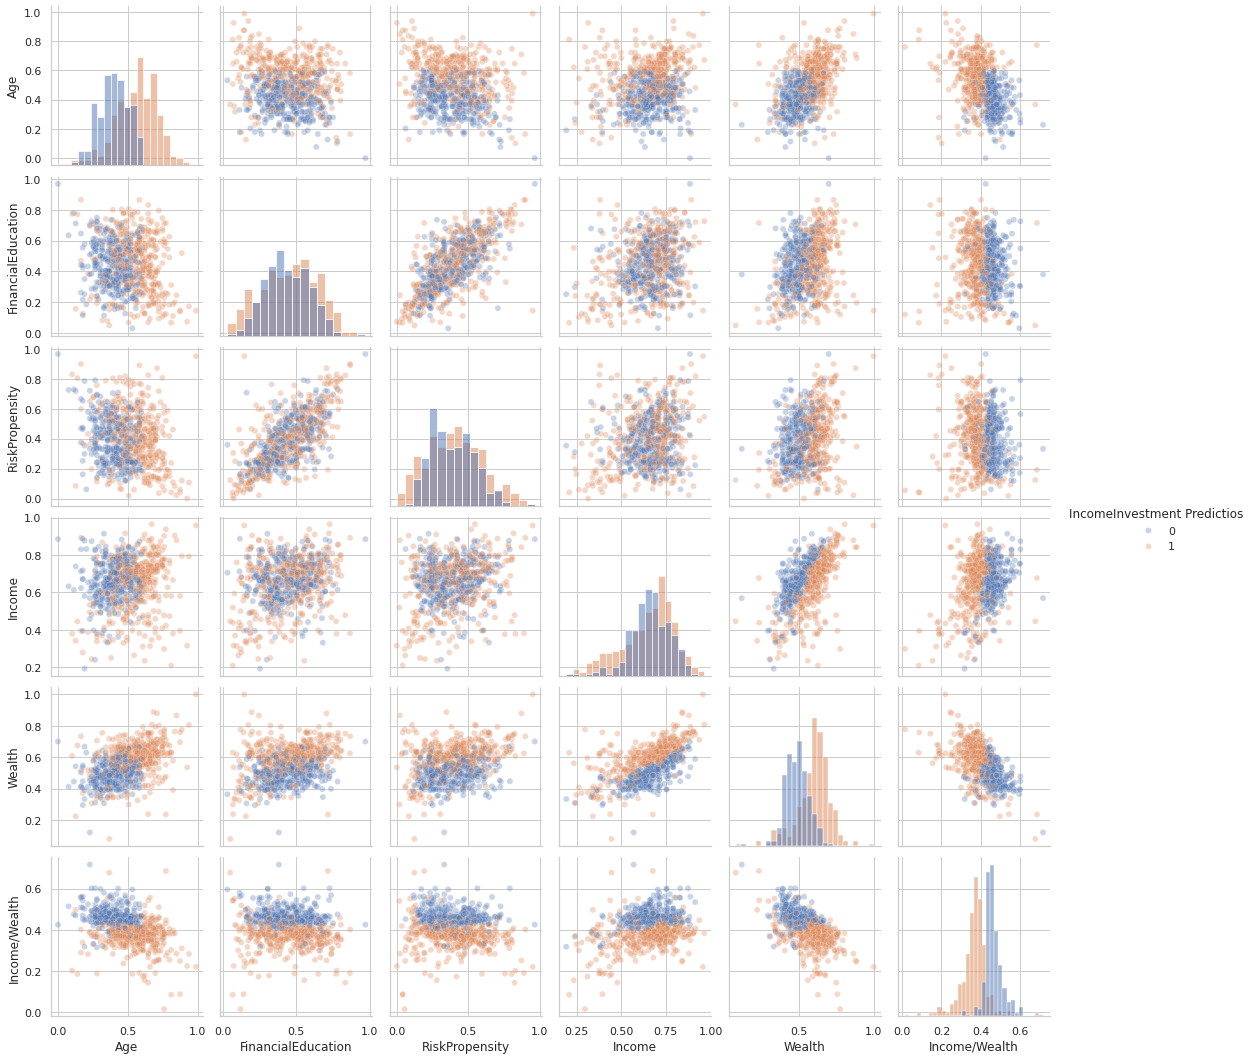

In [5]:
# Scatterplot according to IncomeInvestment prediction
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
sns.pairplot(income_dataset, hue='IncomeInvestment Predictios', diag_kind='hist', plot_kws={'alpha':0.3})
#plt.savefig('PairPlot_IncomeInvestment.png')
plt.show()

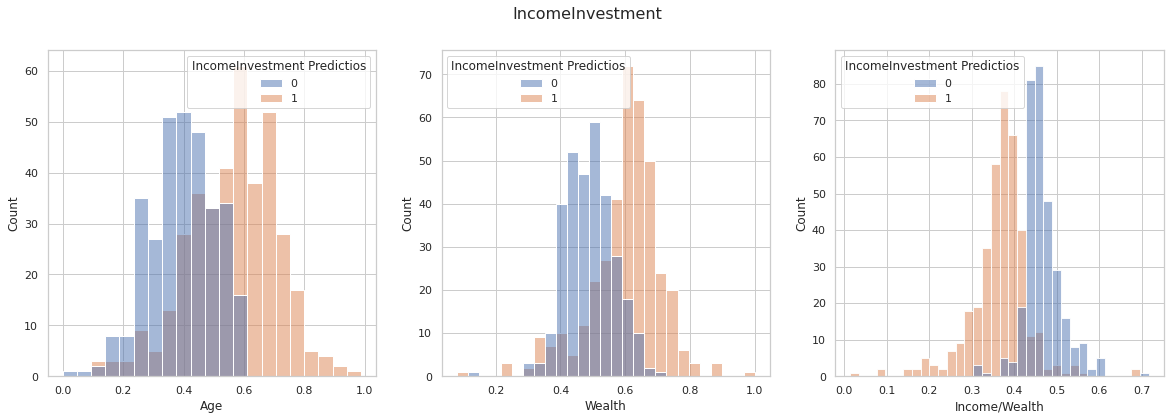

In [6]:
# Focus on the more intresting
sns.set(style='whitegrid')

fig, axes= plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data=income_dataset, x='Age', hue='IncomeInvestment Predictios', multiple='layer', ax = axes[0])
sns.histplot(data=income_dataset, x='Wealth', hue='IncomeInvestment Predictios', multiple='layer', ax = axes[1])
sns.histplot(data=income_dataset, x='Income/Wealth', hue='IncomeInvestment Predictios', multiple='layer', ax = axes[2])
plt.suptitle('IncomeInvestment', fontsize=16)
plt.show()

## Features correlation

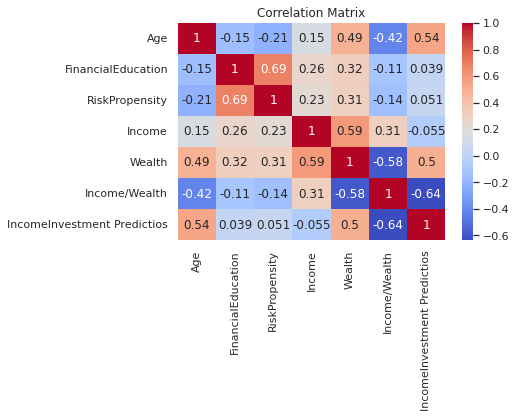

In [7]:
correlation_matrix = income_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Boxplot

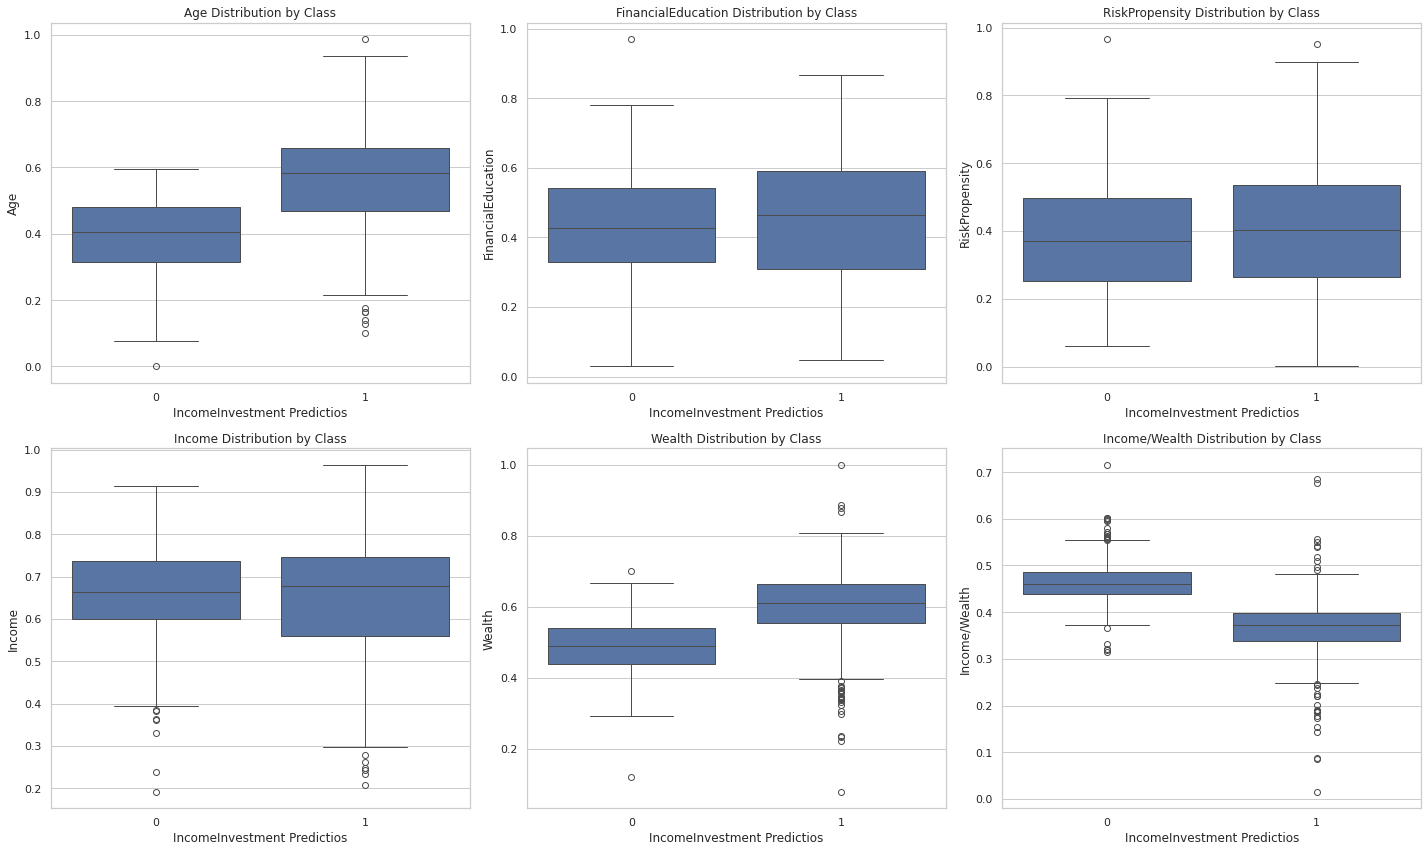

In [8]:
num_plots = len(income_dataset.columns) - 1  # exclude the label
num_rows = num_plots // 3 + (1 if num_plots % 3 != 0 else 0)
num_cols = min(num_plots, 3)

# Subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6*num_rows))

# Boxplot of each variables wrt the predicted class
for i, col in enumerate(income_dataset.columns[:-1]):  
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(x='IncomeInvestment Predictios', y=col, data=income_dataset, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{col} Distribution by Class')


for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

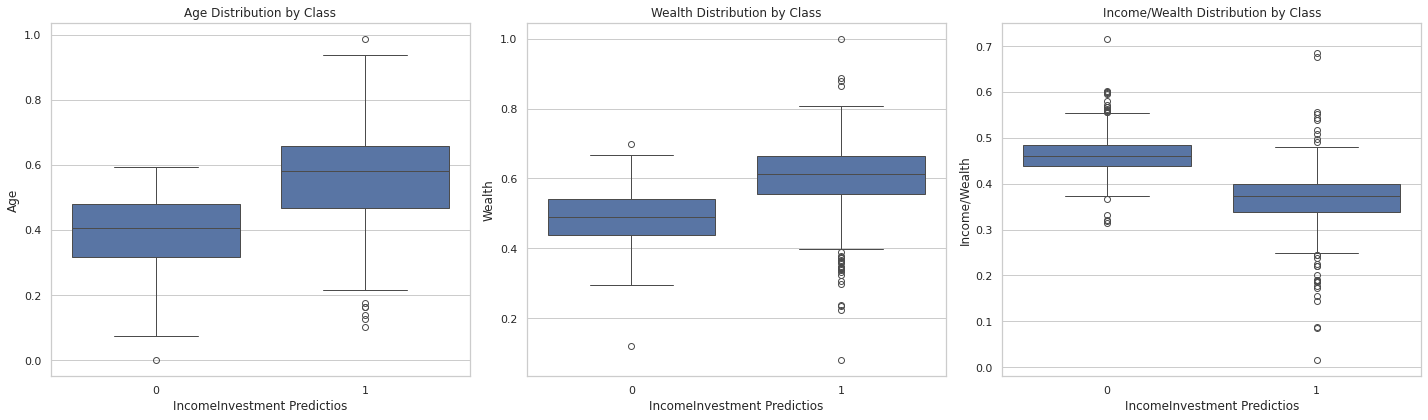

In [9]:
# Only intresting variables
selected_columns = ['Age', 'Wealth', 'Income/Wealth']

num_plots = len(selected_columns)
num_rows = 1
num_cols = 3

# Subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

for i, col in enumerate(selected_columns):
    col_index = i % num_cols
    sns.boxplot(x='IncomeInvestment Predictios', y=col, data=income_dataset, ax=axes[col_index])
    axes[col_index].set_title(f'{col} Distribution by Class')

for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## Violin plot

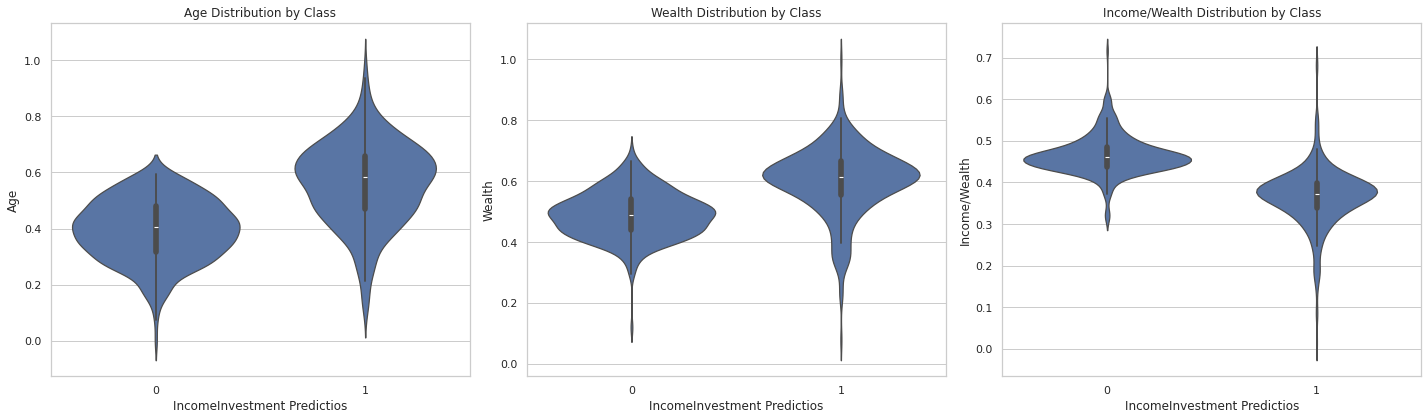

In [10]:
# Only on the intrersting variables
selected_columns = ['Age', 'Wealth', 'Income/Wealth']

num_plots = len(selected_columns)
num_rows = 1
num_cols = 3

# Subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

for i, col in enumerate(selected_columns):
    col_index = i % num_cols
    sns.violinplot(x='IncomeInvestment Predictios', y=col, data=income_dataset, ax=axes[col_index])
    axes[col_index].set_title(f'{col} Distribution by Class')

for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## T-Test

In [11]:
from scipy.stats import ttest_ind

# T test t for every variables wrt the predicted class
for col in income_dataset.columns[:-1]:  
    class_0 = income_dataset[income_dataset['IncomeInvestment Predictios'] == 0][col]
    class_1 = income_dataset[income_dataset['IncomeInvestment Predictios'] == 1][col]
    t_statistic, p_value = ttest_ind(class_0, class_1)
    print(f"Variable: {col}")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    print("="*50)

Variable: Age
T-statistic: -17.050134650242143
P-value: 9.88264458624175e-55
Variable: FinancialEducation
T-statistic: -1.0211905238679613
P-value: 0.30751899770825697
Variable: RiskPropensity
T-statistic: -1.3456743131366884
P-value: 0.17884577043195782
Variable: Income
T-statistic: 1.4553525341483788
P-value: 0.14602256435704786
Variable: Wealth
T-statistic: -15.030213282429887
P-value: 1.998990854790513e-44
Variable: Income/Wealth
T-statistic: 21.841245515279105
P-value: 6.054915705772914e-81


**Comment:**  
From the exploration conducted on the predictions of 'IncomeInvestment', it is evident that the key determining features are 'Age', 'Wealth', and 'Income/Wealth'. This assertion is supported utilizing various visualization techniques such as pairplot, boxplot, correlation matrix, violin plot, and T test for the mean. Additionally, these analyses allow us to infer the prototype of a customer inclined to purchase 'Income' products; such a customer tends to be older and with a higher wealth.

# AccumulationInvestment

In [12]:
# AccumulationInvestement
income_dataset = pd.read_excel('AccumulationInvestment_Predicitons.xlsx')
income_dataset.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,MLP AccumulationInvestment,RF AccumulationInvestment,LR AccumulationInvestment,KNN AccumulationInvestment,SVM AccumulationInvestment,GB AccumulationInvestment,DT+Ada AccumulationInvestment,NB AccumulationInvestment,XGB AccumulationInvestment,Bagging
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,1,0,1,1,1,0,0,1,0,0
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1,1,1,1,1,1,1,1,1,1
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,0,1,1,1,1,1,0,1,1,1
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1,1,1,1,1,1,1,1,1,1
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,1,1,1,1,1,1,1,1,1,1


In [13]:
# Let's keep only the overall prediction, that's the 'bagging' one
columns_to_drop = [6, 7, 8, 9, 10, 11, 12, 13, 14]
income_dataset.drop(income_dataset.columns[columns_to_drop], axis = 1, inplace = True )
income_dataset.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,Bagging
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,0
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,1
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,1


In [14]:
# Change in the name of the prediciton column
new_column_name = {'Bagging': 'AccumulationInvestment Predictios'}
income_dataset = income_dataset.rename(columns=new_column_name)

## Pairplot

Notice that to make the daset balanced for the IncomeInvestment class it has been unbalanced for the AccumulationInvestment class, but at least one the side we prefere, that is AccumulationInvestment = 1

<Figure size 720x720 with 0 Axes>

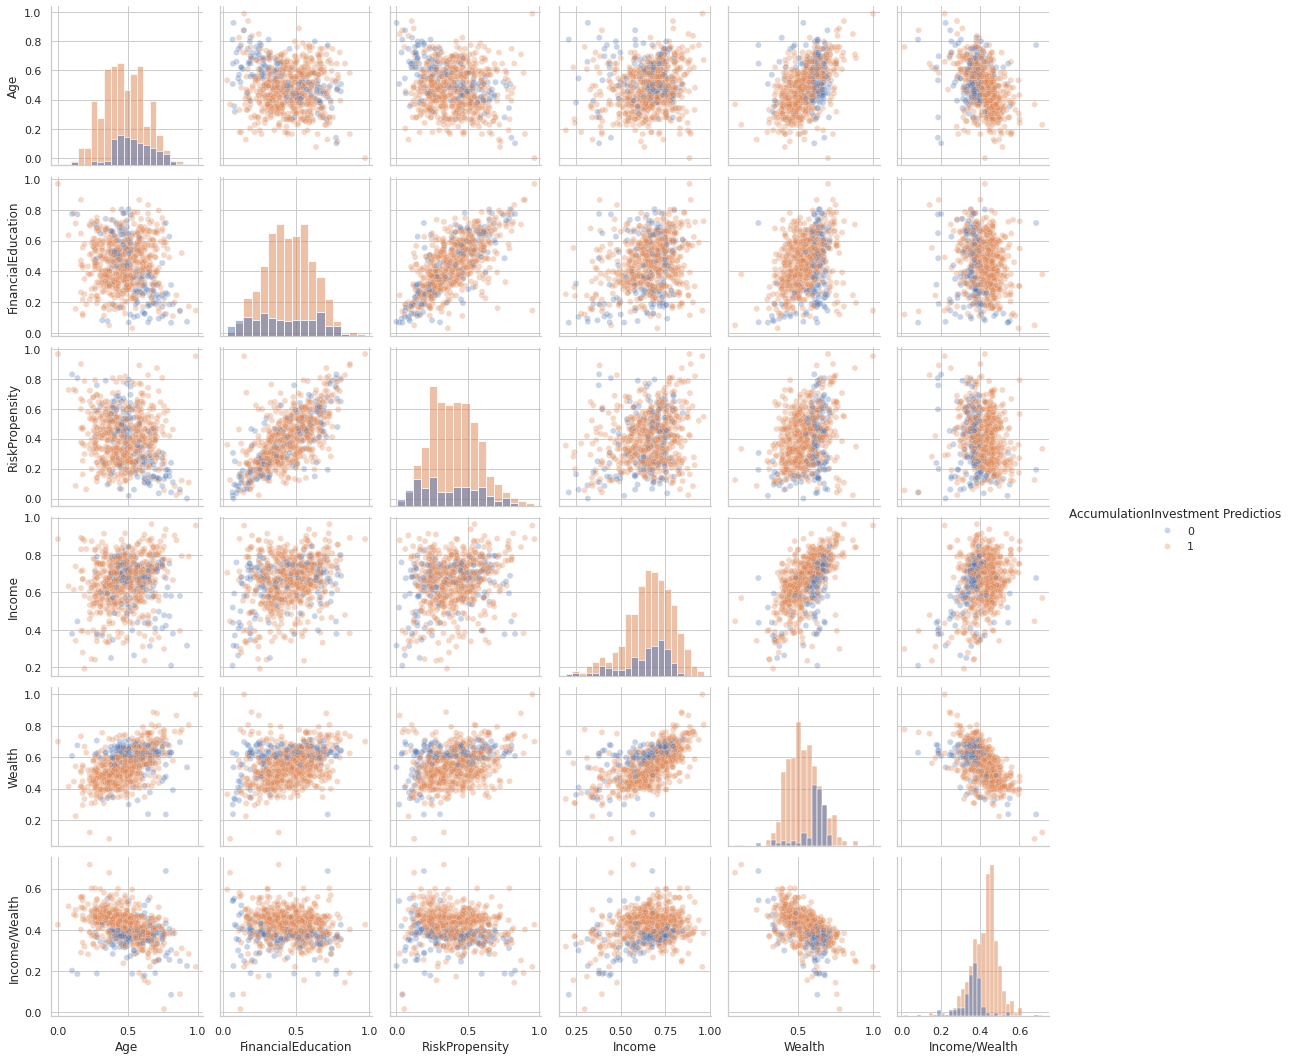

In [15]:
# Scatterplot according to IncomeInvestment prediction
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
sns.pairplot(income_dataset, hue='AccumulationInvestment Predictios', diag_kind='hist', plot_kws={'alpha':0.3})
#plt.savefig('PairPlot_IncomeInvestment.png')
plt.show()

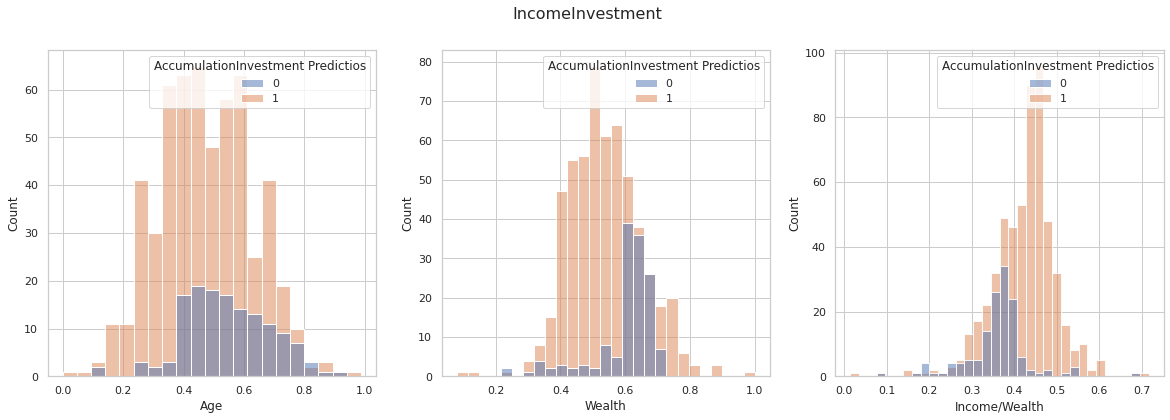

In [16]:
# Focus on the more intresting
sns.set(style='whitegrid')

fig, axes= plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data=income_dataset, x='Age', hue='AccumulationInvestment Predictios', multiple='layer', ax = axes[0])
sns.histplot(data=income_dataset, x='Wealth', hue='AccumulationInvestment Predictios', multiple='layer', ax = axes[1])
sns.histplot(data=income_dataset, x='Income/Wealth', hue='AccumulationInvestment Predictios', multiple='layer', ax = axes[2])
plt.suptitle('IncomeInvestment', fontsize=16)
plt.show()

## Features correlation

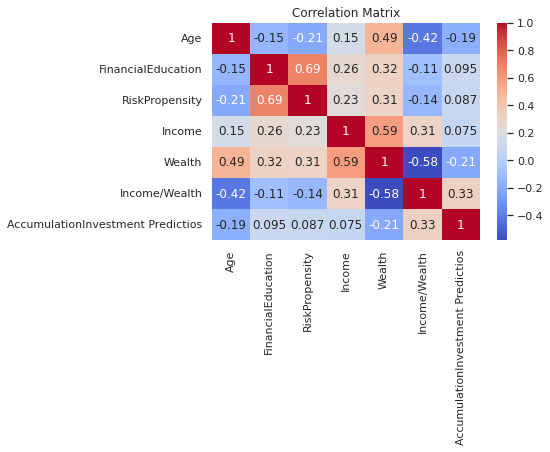

In [17]:
correlation_matrix = income_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Boxplot

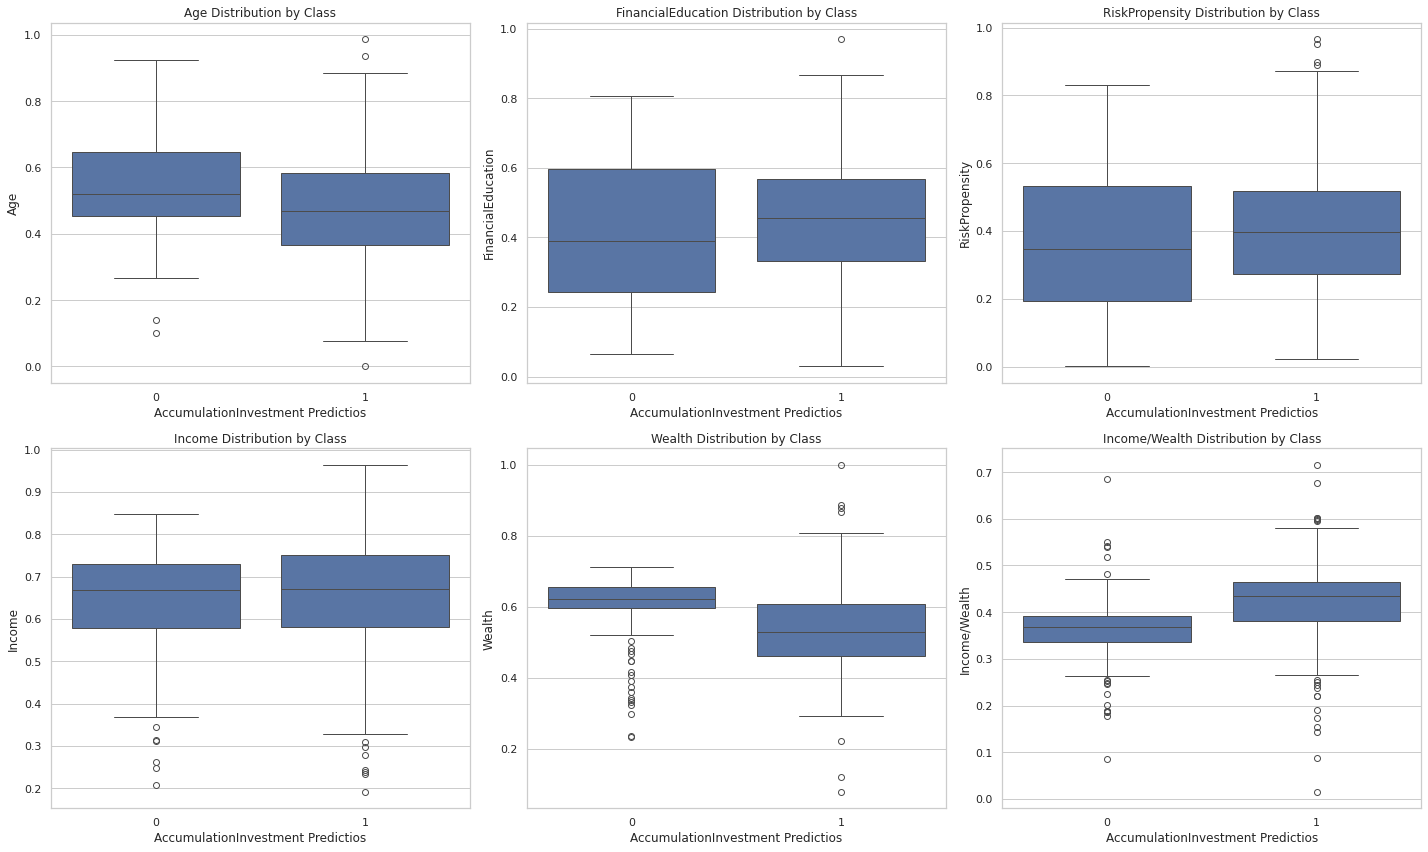

In [18]:
num_plots = len(income_dataset.columns) - 1  # exclude the label
num_rows = num_plots // 3 + (1 if num_plots % 3 != 0 else 0)
num_cols = min(num_plots, 3)

# Subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6*num_rows))

# Boxplot of each variables wrt the predicted class
for i, col in enumerate(income_dataset.columns[:-1]):  
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(x='AccumulationInvestment Predictios', y=col, data=income_dataset, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{col} Distribution by Class')


for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

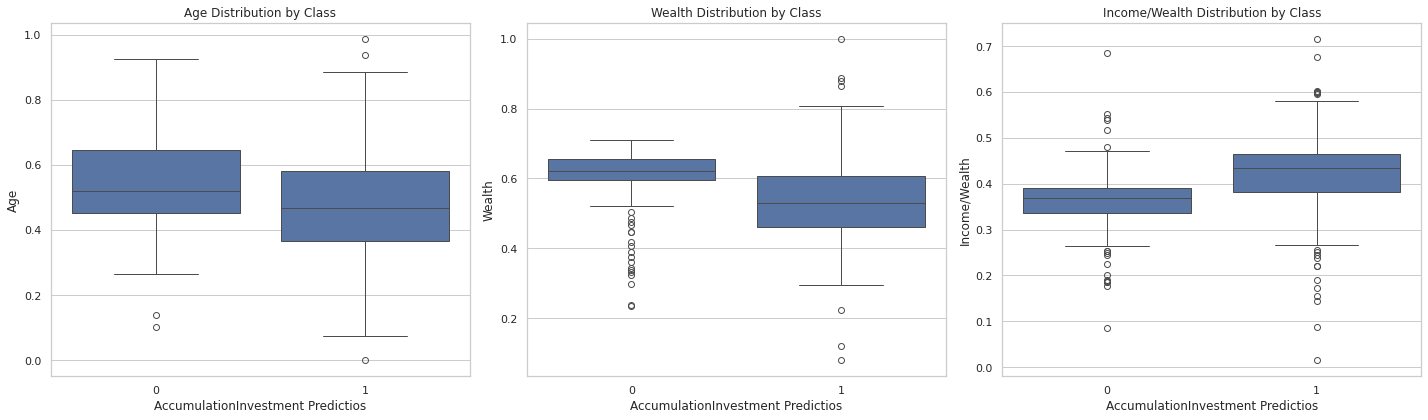

In [19]:
# Only intresting variables
selected_columns = ['Age', 'Wealth', 'Income/Wealth']

num_plots = len(selected_columns)
num_rows = 1
num_cols = 3

# Subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

for i, col in enumerate(selected_columns):
    col_index = i % num_cols
    sns.boxplot(x='AccumulationInvestment Predictios', y=col, data=income_dataset, ax=axes[col_index])
    axes[col_index].set_title(f'{col} Distribution by Class')

for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## Violinplot

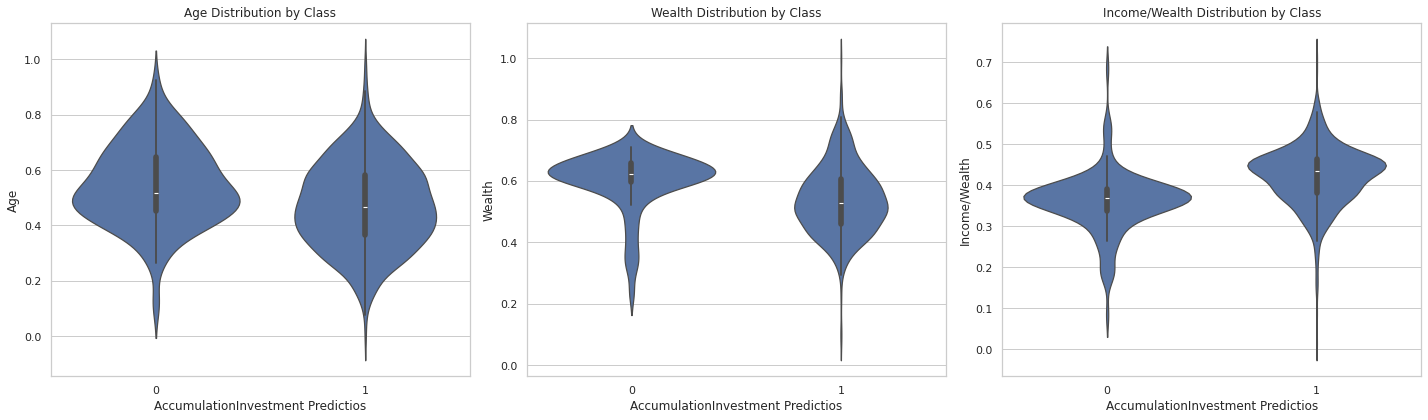

In [20]:
# Only on the intrersting variables
selected_columns = ['Age', 'Wealth', 'Income/Wealth']

num_plots = len(selected_columns)
num_rows = 1
num_cols = 3

# Subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

for i, col in enumerate(selected_columns):
    col_index = i % num_cols
    sns.violinplot(x='AccumulationInvestment Predictios', y=col, data=income_dataset, ax=axes[col_index])
    axes[col_index].set_title(f'{col} Distribution by Class')

for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## T Test

In [21]:
from scipy.stats import ttest_ind

# T test t for every variables wrt the predicted class
for col in income_dataset.columns[:-1]:  
    class_0 = income_dataset[income_dataset['AccumulationInvestment Predictios'] == 0][col]
    class_1 = income_dataset[income_dataset['AccumulationInvestment Predictios'] == 1][col]
    t_statistic, p_value = ttest_ind(class_0, class_1)
    print(f"Variable: {col}")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    print("="*50)

Variable: Age
T-statistic: 5.048960161385142
P-value: 5.67879409496101e-07
Variable: FinancialEducation
T-statistic: -2.5108014125149576
P-value: 0.012271314808220454
Variable: RiskPropensity
T-statistic: -2.292031397312377
P-value: 0.022201494191322918
Variable: Income
T-statistic: -1.9839455253020108
P-value: 0.04765433236380465
Variable: Wealth
T-statistic: 5.773314642973285
P-value: 1.1710351208091489e-08
Variable: Income/Wealth
T-statistic: -9.127465611860401
P-value: 7.475839081336361e-19
